# Data Preprocessing for Sentiment Analysis

In this notebook, we will focus on cleaning and preprocessing the text data collected from social media. This includes tasks such as tokenization, removing stop words, and feature engineering.

In [9]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Download NLTK stopwords
nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Load raw data
raw_data_path = '../data/raw/social_media_data.csv'
data = pd.read_csv(raw_data_path)

# Preprocess the text data
data['cleaned_text'] = data['title'].apply(clean_text)

data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,author,link,published,content,cleaned_text
0,White House point man at Homeland Security sha...,/u/aresef,https://www.reddit.com/r/politics/comments/1iy...,2025-02-26T13:50:06+00:00,"<table> <tr><td> <a href=""https://www.reddit.c...",white house point man homeland security shared...
1,Luigi Mangione pleads with fans to stop sendin...,/u/Healthy_Block3036,https://www.reddit.com/r/politics/comments/1iy...,2025-02-26T13:48:58+00:00,"<table> <tr><td> <a href=""https://www.reddit.c...",luigi mangione pleads fans stop sending many p...
2,Trump Posts Deranged AI Video of His Vision fo...,/u/Boonzies,https://www.reddit.com/r/politics/comments/1iy...,2025-02-26T13:40:22+00:00,"<table> <tr><td> <a href=""https://www.reddit.c...",trump posts deranged ai video vision trump gaza
3,Lying James Comer Threatens to Have Sgt. of Ar...,/u/Expert-Explorer8894,https://www.reddit.com/r/politics/comments/1iy...,2025-02-26T13:39:08+00:00,"<table> <tr><td> <a href=""https://www.reddit.c...",lying james comer threatens sgt arms forcibly ...
4,GOP Wants Musk’s Starlink to Get a Cut of $42 ...,/u/bloomberg,https://www.reddit.com/r/politics/comments/1iy...,2025-02-26T13:32:58+00:00,"<table> <tr><td> <a href=""https://www.reddit.c...",gop wants musk starlink get cut billion biden ...


In [10]:
from textblob import TextBlob

# Define sentiment mapping
sentiment_mapping = {
    "positive": 1,
    "neutral": 0,
    "negative": -1
}

# Perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return sentiment_mapping["positive"]
    elif polarity == 0:
        return sentiment_mapping["neutral"]
    else:
        return sentiment_mapping["negative"]

In [11]:
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)



In [12]:

cleaned_data=data.drop(['title', 'author', 'link', 'published','content'], axis = 1)

cleaned_data.head()

,cleaned_text,sentiment
0,white house point man homeland security shared...,0
1,luigi mangione pleads fans stop sending many p...,1
2,trump posts deranged ai video vision trump gaza,0
3,lying james comer threatens sgt arms forcibly ...,1
4,gop wants musk starlink get cut billion biden ...,1


In [13]:
unique_rows = cleaned_data.drop_duplicates()
print(f"Number of unique rows: {unique_rows.shape[0]}")
unique_rows.head()

Number of unique rows: 164


,cleaned_text,sentiment
0,white house point man homeland security shared...,0
1,luigi mangione pleads fans stop sending many p...,1
2,trump posts deranged ai video vision trump gaza,0
3,lying james comer threatens sgt arms forcibly ...,1
4,gop wants musk starlink get cut billion biden ...,1


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(cleaned_data['cleaned_text'])

# Convert the result to a DataFrame
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the unique words and their counts
unique_words = bag_of_words_df.sum(axis=0)
print(unique_words.sort_values(ascending=False).head(10))  # Display top 10 most frequent words

# Display the shape of the Bag of Words DataFrame
print(f"Shape of Bag of Words DataFrame: {bag_of_words_df.shape}")

happy      580
made       460
ai         280
new        240
study      240
daily      240
posting    220
trump      220
updates    220
two        200
dtype: int64
Shape of Bag of Words DataFrame: (3925, 1049)


         sentiment
count  3925.000000
mean      0.342930
std       0.722511
min      -1.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


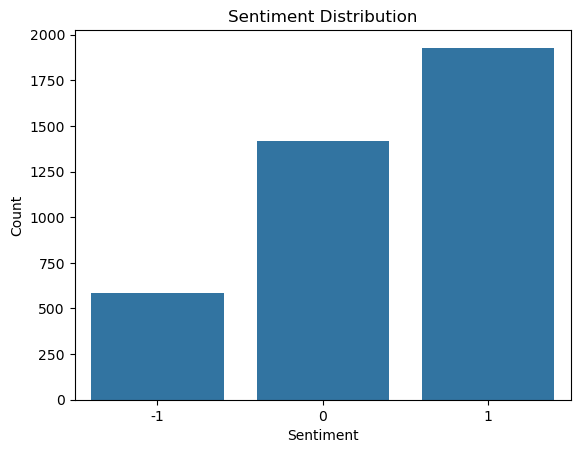

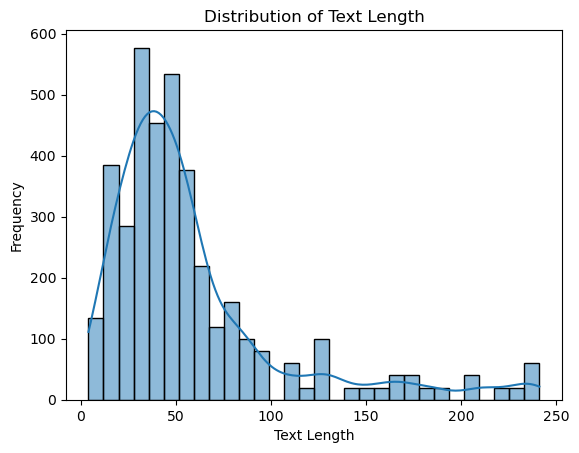

In [15]:
import seaborn as sns

import matplotlib.pyplot as plt

# Display basic statistics
print(cleaned_data.describe())

# Display the distribution of sentiments
sns.countplot(x='sentiment', data=cleaned_data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Display the length of cleaned text
cleaned_data['text_length'] = cleaned_data['cleaned_text'].apply(len)
sns.histplot(cleaned_data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()





In [16]:
import os

# Define absolute path for data directory
processed_data_path = r"C:\Users\ankit\Desktop\LORU\sentiment-analysis-app\data\processed"


file_path = os.path.join(processed_data_path, "processed_data.csv")

# Ensure the directory exists
os.makedirs(processed_data_path, exist_ok=True)

# Save the DataFrame if it exists
if "data" in locals():
    cleaned_data.to_csv(file_path, index=False, mode="w")
    print(f"Data saved at: {file_path}")
else:
    print("No data to save.")


Data saved at: C:\Users\ankit\Desktop\LORU\sentiment-analysis-app\data\processed\processed_data.csv
